In [1]:
Yi-Wen Hung k1800026/1824230

# Coursework Assignment  
# DUE on KEATS on Sunday 9th of December, by 2355 (GMT)

- This is worth 10% of your final grade
- There are five parts to this assignment and the breakdown of the points is at the end of this document.
- You should complete the answer cells in this iPython notebook (.ipynb), and submit the completed notebook on Keats.
- Use the specified file names for each of the scripts - marks will be deducted for not following these instructions
- You must do and submit your own work, there is no collaborating and no group work allowed on this module.
- Make sure that you properly comment your code, so that the person marking this can understand what your program is doing. Uncommented or poorly commented code will result in mark deductions

Notes: 
1. For each of the below questions, please provide code in the indicated cells. 
2. Read over the coursework instructions fully before starting. Please read each Part carefully, as there may be multiple subquestions contained within each Part.

# The Data

The data for this assignment is on Keats as a .zip file. Download the .zip file and unpack it to a **data/** directory. The **data/** directory should be in the same directory as your python scripts.

(In spyder make sure the environment is pointing to this directory). Make sure that your python
scripts read input data files and write output data files to the **data/** directory. Any files that are
output elsewhere will not be graded

# Overview

This coursework will have you working with XML, CSV, and JSON files with data related to a Pizza Shop! Your scripts will read and write data files, and a set of sample of input and output files are provided for you as an example of the format of the expected output.

## Part 1: Pizza Menu

The "CMP Pizza Shop", has menu options stored in an XML data file, called **pizza.xml**. You will find the menu in the **pizza.xml** file in the **data.zip** provided with this Coursework.

The **pizza.xml** file includes the following information:

- the name of the pizza shop
- the sizes of the pizzas
- the toppings available
- the different crusts

Here is an example menu in xml, for illustrative purposes (note that the pizza.xml file provided in the data.zip archive, might be different from this example):

    <pizza>
    	<shopname>CMP Pizza Shop</shopname>
    	<sizes>
    		<size code="L">Large</size>
    		<size code="XL">Extra Large</size>
    	</sizes>
    	<toppings>
    		<topping code="x">Extra Cheese</topping>
    		<topping code="m">Mushrooms</topping>
    	</toppings>
    	<crusts>
    		<crust code="thick">Thick Crust</crust>
    	</crusts>
    </pizza>

### Question 1 (a)

Write python code in the below indicated cell, that reads in the **pizza.xml** file (located in data.zip), as an input using **xml.etree.ElementTree module**. (See lecture 2 and lab 2). Make sure you implement exception handling.

### Question 1 (b)

Using the ElementTree structure, print a human readable menu of pizza options for the pizza shop. This must include the pizza shop name, the pizza sizes, toppings, and crust options. For example, a human readable menu might look like the below:

        CMP Pizza Shop
        Sizes
        - Large
        - Extra Large

        Toppings
        - Extra Cheese
        - Mushrooms

        Crusts
        - Thick Crust


In [59]:
"""Question 1 (a)"""
import xml.etree.ElementTree as et
try:
    tree = et.ElementTree(file = "data/pizza.xml") # load xml file
    root = tree.getroot()
except IOError as ioe:
    print("I/O Error occurred: %s" % ioe)
except Exception as e:
    print("There was an error: %s" % e)
    
"""Question 1 (b)"""
try:
    for child in root:        
        if child.tag == "shopname":
            print(child.text.strip())
        else:
            print(child.tag)            
            for grandchild in child:
                print("- %s" % grandchild.text.strip())
        print    # print a blank space make it more readable
except Exception as e:
    print("There was an error: %s" % e)

CMP Pizza Shop

sizes
- Extra Small
- Small
- Medium
- Large
- Extra Large

toppings
- Chilli
- Mushrooms
- Extra Cheese

crusts
- Thin Crust
- Thick Crust
- Cheesy Crust
- Tomato Crust



## Part 2: Pizza Report

Using the datastructure created in **Part 1** of this coursework, write a program in the below indicated space that calculates the following:

### Question 2 (a)

1. The number of pizza sizes that are available from our pizza menu
2. The number of toppings that are available in the pizza menu
3. The number of crust options available in the pizza menu
4. The total number of combinations of **different** pizzas that can be assembled from this menu. 

Assume the following about each pizza:
	
- a pizza can only be one size (one pizza cannot be large and extra large at the same time)
- a pizza can have any combinations of toppings, including none, one or all
- a pizza can only have one type of crust (i.e. either thick or thin crust)

Print the output of each calculation, along with a string denoting the value. For example

    Number of pizza sizes = 2
    Number of toppings = ...
    ...

### Question 2 (b)

After printing these calculations, use the python CSV module to output your calculations as a single row of data to a CSV file with the name **pizza_report.csv**. Assume the following header for your CSV file along with the calculated numbers from the previous example:

    sizes,toppings,crusts,total_combo  

### Question 2 (c)

After writing the report, re-open the file **pizza_report.csv**, and print each line of the file to the notebook.

In [55]:
"""Question 2 (a)"""
import xml.etree.ElementTree as et
try:
    tree = et.ElementTree(file = "data/pizza.xml") # load xml file
    root = tree.getroot()
except IOError as ioe:
    print("I/O Error occurred: %s" % ioe)
except Exception as e:
    print("There was an error: %s" % e)

# a-1
sizes_tag = root.find("sizes") # find the sizes tag
print("Number of pizza sizes : %d" % len(sizes_tag))

# a-2
toppings_tag = root.find("toppings") # find the toppings tag
print("Number of pizza toppings : %d" % len(toppings_tag))

# a-3
crusts_tag = root.find("crusts") # find the crusts tag
print("Number of pizza crusts : %d" % len(crusts_tag))

# a-4
combinations = len(sizes_tag) * (2 ** len(toppings_tag)) * len(crusts_tag)
print("Total number of combinations of different pizzas : %d" % combinations)
print # print a blank space make it more readable

"""Question 2 (b)"""
import csv

filename = "data/pizza_report.csv"
fieldnames = ["sizes", "toppings", "crusts", "total_combo"]
row_data = [{"sizes" : len(sizes_tag), "toppings" : len(toppings_tag), "crusts" : len(crusts_tag), "total_combo" : combinations}]

try:
    with open(filename, "wb") as pizzafile: # open a file context
        writer = csv.DictWriter(pizzafile, fieldnames = fieldnames)
        writer.writeheader() # Writes the header to the file
        writer.writerows(row_data) # Writes the rows to the file
except IOError as ioe:
    print("I/O Error occurred: %s" % ioe)
    
"""Question 2 (c)"""
try:
    with open(filename, "r") as pizza_fd: # open a file context
        csv_data = csv.DictReader(pizza_fd, fieldnames = fieldnames)
        menu= list(csv_data) # converts the *iterator* into a list
except IOError as ioe:
    print("I/O Error occurred: %s" % ioe)
    
for row in menu[1:]:
    print row
    # or print out in a more readable way
    print("no. of sizes : %s, no. of toppings : %s, no. of crusts : %s, no. of combinations : %s" % (row["sizes"], row["toppings"], row["crusts"], row["total_combo"]))


Number of pizza sizes : 5
Number of pizza toppings : 3
Number of pizza crusts : 4
Total number of combinations of different pizzas : 160

{'toppings': '3', 'total_combo': '160', 'crusts': '4', 'sizes': '5'}
no. of sizes : 5, no. of toppings : 3, no. of crusts : 4, no. of combinations : 160


## Part 3: Pizza Specials


In addition to the standard menu, the CMP pizza shop also stores **Pizza Specials** in a file **pizza_specials.csv**, with the following format:

    name,size,toppings,crust  
    Supreme,XL,xm,thick  
    Simple Cheese,L,x,thick


Every pizza special has a name, a size, a combination of toppings, and a crust. The size, toppings, and crust are referenced by a code attribute, which is specified in the pizza.xml XML file. For example, the topping code for Mushrooms is "m", and the topping code for Extra Cheese is "x". The Supreme pizza has both Mushrooms and Extra Cheese as designated by the string "xm". 

### Part 3 (a)

Write code in the answer cell below, that reads in the pizza.xml file (again using the xml.etree.ElementTree module) and stores the sizes, toppings, and crusts in dictionaries with the code for that element as the key and the text for the element as the value.

### Part 3 (b)

Using these dictionaries, read in the Pizza Specials from the pizza_specials.csv file and convert them to a menu text description. 

### Part 3 (c)

Write code to output each special's menu description as a human readable line in a text file called **pizza_specials.txt**. For example, the Supreme special would be output in the txt file as:

        Supreme: Extra Large Pizza with Extra Cheese and Mushrooms and Thick Crust 
   
### Part 3 (d)

After writing the pizza Specials, re-open the file **pizza_specials.txt**, and print each line of the file to the notebook.

In [56]:
"""Question 3 (a)"""
import xml.etree.ElementTree as et
try:
    tree = et.ElementTree(file = "data/pizza.xml") # load xml file
    root = tree.getroot()
    
    for child in root:
        if child.tag == "sizes":
            sizes_dict = {}
            for grandchild in child:
                sizes_dict.update({grandchild.attrib.values()[0] : grandchild.text.strip()})
        elif child.tag == "toppings":
            toppings_dict = {}
            for grandchild in child:
                toppings_dict.update({grandchild.attrib.values()[0] : grandchild.text.strip()})
        elif child.tag == "crusts":
            crusts_dict = {}
            for grandchild in child:
                crusts_dict.update({grandchild.attrib.values()[0] : grandchild.text.strip()})

except IOError as ioe:
    print("I/O Error occurred: %s" % ioe)
except Exception as e:
    print("There was an error: %s" % e)

# print code for debugging     
# print sizes_dict
# print toppings_dict
# print crusts_dict

"""Question 3 (b)"""
import csv

try:
    filename = "data/pizza_specials.csv"
    pizza_menu = []
    with open(filename, "r") as special_file: # open a file context
        csv_data = csv.DictReader(special_file)
        menu= list(csv_data) # converts the *iterator* into a list
        for row in menu:
            separate = list(row["toppings"]) # separate xm into x and m            
            combine_topping = []  
            for flavor in separate:
                combine_topping.append(toppings_dict[flavor]) # combine Extra Cheese and Mushrooms into a list
            top = " and ".join(combine_topping) # transfer into readable text
            # use the dictionaries built in (a) to store information into a temporary dictionary
            temp_dict = dict(name = row["name"], size = sizes_dict[row["size"]], crust = crusts_dict[row["crust"]]) 
            temp_dict.update({"toppings" : top})            
            print temp_dict           
            pizza_menu.append(temp_dict)  # update temporary dictionary into pizza_menu

except IOError as ioe:
    print("I/O Error occurred: %s" % ioe)
except Exception as e:
    print("There was an error: %s" % e)
    
"""Question 3 (c)"""
try:
    with open("data/pizza_specials.txt", "w") as s_file: # open a file context
        for row in pizza_menu:
            s_file.write("%s : %s Pizza with %s and %s\n" %(row["name"], row["size"], row["toppings"], row["crust"]) )
except IOError as ioe:
    print("I/O Error occurred: %s" % ioe)
except Exception as e:
    print("There was an error: %s" % e)
    
"""Question 3 (d)"""
try:
    with open("data/pizza_specials.txt", "r") as s_file: # open a file context
        for line in s_file:
            print (line.strip())
except IOError as ioe:
    print("I/O Error occurred: %s" % ioe)
except Exception as e:
    print("There was an error: %s" % e)

{'toppings': 'Extra Cheese and Mushrooms', 'crust': 'Thick Crust', 'name': 'Supreme', 'size': 'Extra Large'}
{'toppings': 'Extra Cheese', 'crust': 'Thick Crust', 'name': 'Simple Cheese', 'size': 'Large'}
Supreme : Extra Large Pizza with Extra Cheese and Mushrooms and Thick Crust
Simple Cheese : Large Pizza with Extra Cheese and Thick Crust


## Part 4: Pizza Decider


**Who should get a pizza?** 

This part of the coursework will use a data set collected from the Reddit group **"Random Acts of Pizza"** (https://www.reddit.com/r/Random_Acts_Of_Pizza/). Random Acts of Pizza is a community on the website Reddit.com that facilitates the sending and receiving of pizzas between strangers. People write a request for a pizza on the Reddit group and someone may accept their request and order them a pizza!

(a version of this data is also available on Kaggle)

A data set has been collated for the textual requests to this Reddit Group. A simplified excerpt of the requests to /r/Random_Acts_of_Pizza has been provided in the text file **random_acts_pizza.csv**. There are 4 columns in this CSV file:

- requester_username - the name of the user requesting pizza
- request_text - the text of the pizza request written by the user
- requester_received_pizza - a Boolean whether or not the pizza request was accepted
- requester_account_age_in_days_at_request - the age of the reddit user account, measured at the time the user made the request

In this question, you will need to write code that will use this the random_acts_pizza.csv file to automate the decision as to whether a new request for pizza should be accepted or not.

### Part 4 (a)

Using the csv python module, read in the "Random Acts of Pizza" request history that is contained in the **random_acts_pizza.csv** file.  Add a class called PizzaDecider to your program, which uses the request history to output a boolean value, deciding whether or not a new request for pizza should be accepted. This decision is based according to the following criteria:

1) The user requesting a new pizza (identified by their username) has **not previously received** a pizza from the "Random Acts of Pizza" group.
2) The text of the user's pizza request is longer than **400 characters** in length.

### Part 4 (b)

After you have created the PizzaDecider class, use the json python module to have your program read in a file called pizza_request.json, which contains one request for pizza. The request file is a dictionary which has two keys:  
-- requester_username - the name of the user requesting pizza
-- request_text - the text of the pizza request written by the user

For an example pizza request see the file, **pizza_request.json** in the data.zip.

Your program will pass the pizza request read in from the pizza_request.json file, to a method in the PizzaDecider class that will return a boolean whether or not the user should get a pizza according to the criteria above.

### Part 4 (c)

Your program should now write out the decision from the PizzaDecider to a new JSON file called pizza_decision.json which is a dictionary with the following keys: 
- requester_username - the name of the user requesting pizza
- request_text - the text of the pizza request written by the user
- receive_pizza - a Boolean, stating whether or not the pizza request should be accepted according to the criteria

For an example of the expected output, see the file **pizza_decision.json** in the data.zip, for the pizza decision from the **pizza_request.json** example mentioned earlier.

### Part 4 (d)
Print to the notebook the decision for the user given in **pizza_decision.json**. For example,
        
        User: "spez" request for pizza should not be accepted.

In [57]:
"""Question 4 (a)"""
import csv

class PizzaDecider():
    """
    Use the request history to decide whether or not a new request for pizza should be accepted.  
    """
    def __init__(self, new_order, order_history):
        self.username = new_order["requester_username"]
        self.text = new_order["request_text"]
        self.order_history = order_history
    
    def decide_order(self):
        if len(self.text) <= 400:
            return False
        for order in self.order_history:
            if self.username == order["requester_username"] and order["requester_received_pizza"] == "FALSE":
                return True
            elif self.username == order["requester_username"] and order["requester_received_pizza"] == "TRUE":
                return False
            else:
                continue
    
try:
    with open("data/random_acts_pizza.csv", "r") as csv_file: # open a file context
        csv_data = csv.DictReader(csv_file)
        order_history = list(csv_data) # converts the *iterator* into a list
         
except IOError as ioe:
    print("I/O Error occurred: %s" % ioe)
except Exception as e:
    print("There was an error: %s" % e)
    
"""Question 4 (b)"""
import json
try:
    with open("data/pizza_request.json","r") as jsonfile: # open a file context
        new_order = json.load(jsonfile)
        request = PizzaDecider(new_order, order_history)
        ans = request.decide_order()
        # print out the answer to check
        print("Request of '%s' should be accepted? %s" %(request.username,str(ans)))
        print # print a blank space make it more readable
        
except IOError as ioe:
    print("I/O Error occurred: %s" % ioe)
except Exception as e:
    print("There was an error: %s" % e)
    
"""Question 4 (c)"""
try:
    pizza_dict = {"requester_username" : new_order["requester_username"], "request_text" : new_order["request_text"], "receive_pizza" : ans}
    with open("data/pizza_decision.json","w") as newfile:
        json.dump(pizza_dict,newfile)

except IOError as ioe:
    print("I/O Error occurred: %s" % ioe)
except Exception as e:
    print("There was an error: %s" % e)
    
"""Question 4 (d)"""
try:
    with open("data/pizza_decision.json","r") as j_file: # open a file context
        decision = json.load(j_file)
        # print in a readable way according to whether the order being accepted or not
        if decision["receive_pizza"] == True:
            word = ""
        else:
            word = "not "
        print("User: '%s' request for pizza should %sbe accepted." %(decision["requester_username"], word))
            
except IOError as ioe:
    print("I/O Error occurred: %s" % ioe)
except Exception as e:
    print("There was an error: %s" % e)

Request of 'anyquestions' should be accepted? False

User: 'anyquestions' request for pizza should not be accepted.


## Part 5: Visualing Pizza data

For this final part of the coursework, you will use statistical visualisation techniques you have covered in the module, to help explore the data. This question will use the **random_acts_pizza.csv** file from the previous question.


Using the **random_acts_pizza.csv** file, create a figure containing a subplot, with two rows, and two columns. Plot the following diagrams from the **seaborn** library in the subplots.
1. A distplot of the account age at the time of request (**requester_account_age_in_days_at_request**) 
2. A boxplot, where the x-axis (the catagory) is if the request was fullfilled or not (**requester_received_pizza**), and the y-axis is the lenth of the request string (the length of **request_text**)
3. A violin plot, where the x-axis (the catagory) is if the request was fullfilled or not (**requester_received_pizza**), and the y-axis is the number of times the string **pizza** is counted in **request_text**
4. A 2D scatterplot, where the x-axis is the account age, the y-axis is the length of the request, and the marker color if different depending on if the request was fullfilled (**requester_received_pizza**)

Remember to label axes, and choose appropriate informative titles for the plots.

Text(0,0.5,'length of the request')

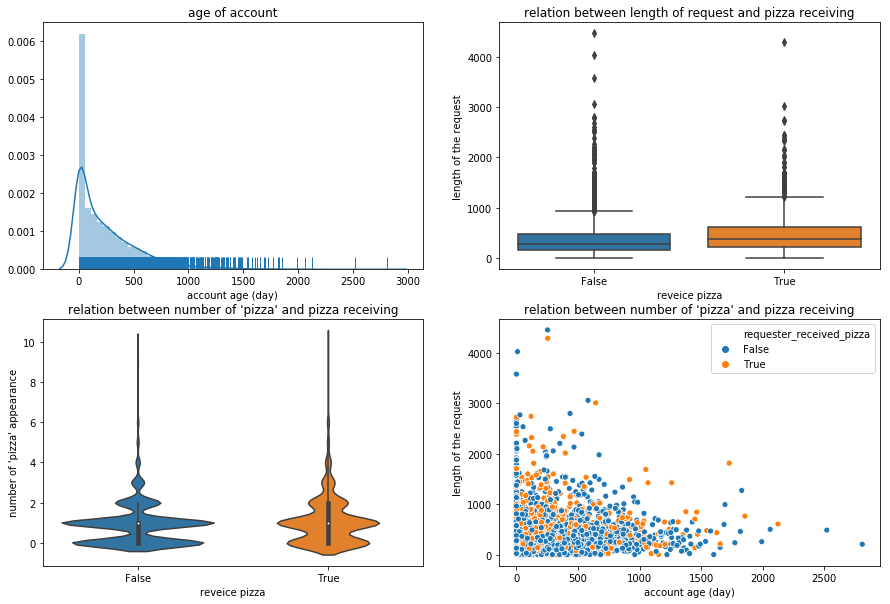

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
try:
    pizza = pd.read_csv("data/random_acts_pizza.csv") # open a file context
except IOError as ioe:
    print("I/O Error occurred: %s" % ioe)
except Exception as e:
    print("There was an error: %s" % e)

"""Question 5 (1)"""
plt.figure(figsize=(15,10)) # set the size 
plt.subplot(2,2,1)
pic1 = sns.distplot(pizza["requester_account_age_in_days_at_request"], rug = True)
pic1.set_title("age of account")
pic1.set_xlabel("account age (day)")

"""Question 5 (2)"""
length_list = [len(str(i)) for i in pizza["request_text"]] # calculate the lenth of the request string 
plt.subplot(2,2,2)
pic2 = sns.boxplot(x = 'requester_received_pizza', y = length_list, data = pizza)
pic2.set_title("relation between length of request and pizza receiving")
pic2.set_xlabel("reveice pizza")
pic2.set_ylabel("length of the request")

"""Question 5 (3)"""
count_list = [str(i).lower().count("pizza") for i in pizza["request_text"]] # count 'pizza' in the request string 
plt.subplot(2,2,3)
pic3 = sns.violinplot(x = 'requester_received_pizza', y = count_list, data = pizza)
pic3.set_title("relation between number of 'pizza' and pizza receiving")
pic3.set_xlabel("reveice pizza")
pic3.set_ylabel("number of 'pizza' appearance")

"""Question 5 (4)"""
plt.subplot(2,2,4)
pic4 = sns.scatterplot(x = "requester_account_age_in_days_at_request", y = length_list, data = pizza, \
                       hue = "requester_received_pizza")
pic4.set_title("relation between number of 'pizza' and pizza receiving")
pic4.set_xlabel("account age (day)")
pic4.set_ylabel("length of the request")

# What to submit on Keats

For this coursework you will complete all the answer cells a shown above in this iPython Notebook.
The header of this notebook should contain your **name** and your **student number**.

Put this file, as well as any data files that have been generated as outputs for the questions above, into a **.zip** file, and upload to the indicated folder on Keats.

# Point Breakdown

The coursework will be marked out of 100 points, as follows:

- Part 1: 30 Marks
- Part 2: 20 Marks
- Part 3: 20 Marks
- Part 4: 20 Marks
- Part 5: 10 Marks

For each of the parts of the coursework marks are awarded for:
- code that runs and performs all tasks as laid out in the assignment
- appropriate use of functions and clear code layout
- well commented code

**This ASSIGNMENT is worth 10% of your mark for this module.**

# College Policy on Late Submissions

- Submissions uploaded within 24 hours of the deadline will be marked no higher than 40%
- Submissions uploaded after 24 hours of the deadline will be marked 0, unless mitigating circumstances occur.
- A mitigating circumstances form must be filed in the Informatics department office. See http://www.kcl.ac.uk/mitcircs for more details.